## House Price Prediction Linear Regression
#### Why Linear Regression?
##### 1. Simple and Interpretable
- It’s one of the easiest models.
- You can clearly see how each input feature affects the output.
- It gives you a straight-line relationship between inputs and output.
##### 2. Fast to Train and Predict
- Works well on small to medium datasets.
- Very efficient compared to more complex models like Random Forests or Neural Networks.
##### 3. Baseline Model
- Often used as a first model to set a baseline.
- If Linear Regression performs well, your data may already have strong linear patterns.

In [2]:
#Import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import mean_squared_error, r2_score
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("C:/Users/PC/Downloads/Housing.csv")

### Exploratory Data Analysis (EDA)

In [4]:
print("First Five Rows")
df.head()

First Five Rows


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
print("Dataset Basic Information")
(df.info())

Dataset Basic Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


### Cleaning the Dataset

In [6]:
# Check for Missing Values
print("Missing values:\n", df.isnull().sum())

Missing values:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [7]:
# Check for duplicate records
print("Duplicate Records:", df.duplicated().sum())

Duplicate Records: 0


In [8]:
# Basic Statistics 
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


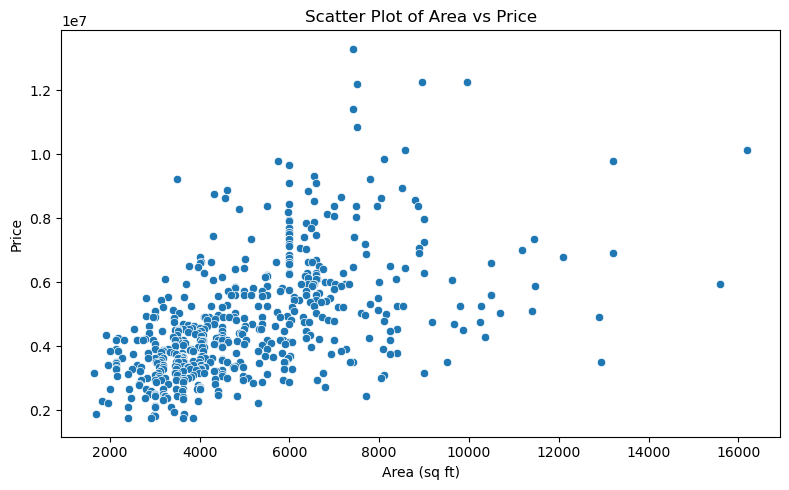

In [9]:
# A scatter plot of area vs price
plt.figure(figsize=(8, 5))
sns.scatterplot(x='area', y='price', data=df)
plt.title('Scatter Plot of Area vs Price')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

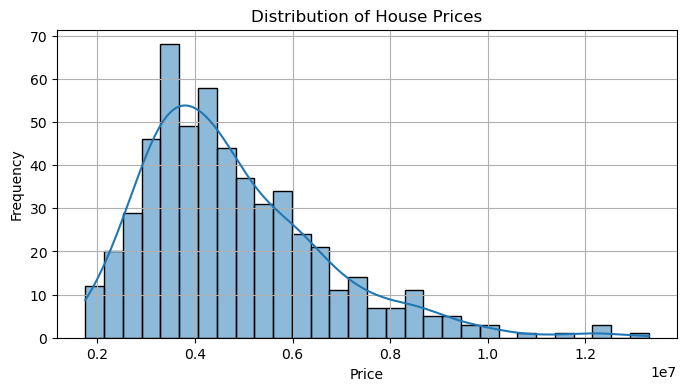

In [11]:
# Price Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

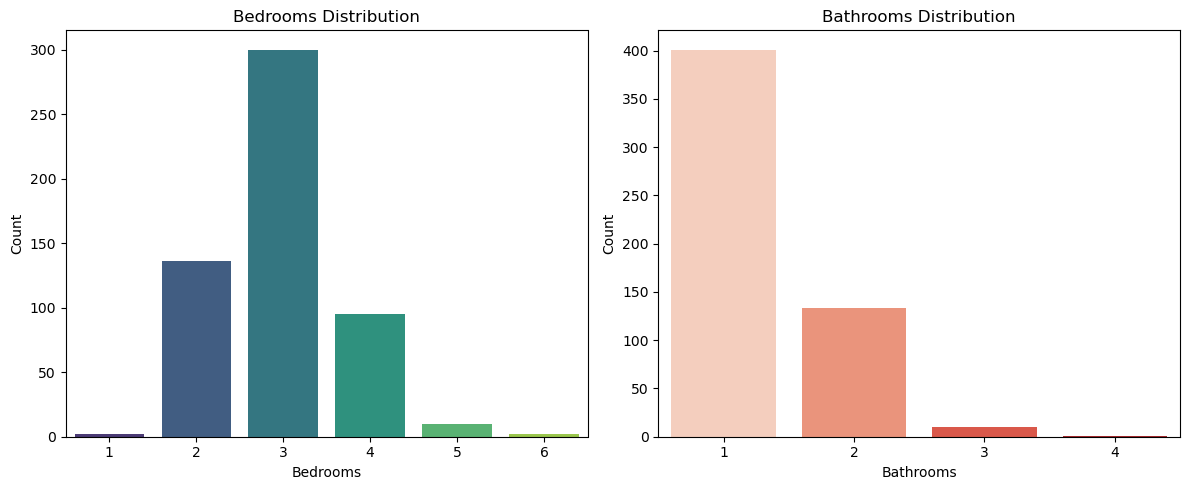

In [12]:
# Bedrooms and Bathrooms Distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Countplot for bedrooms
sns.countplot(x='bedrooms', data=df, ax=axes[0], palette = 'viridis')
axes[0].set_title('Bedrooms Distribution')
axes[0].set_xlabel('Bedrooms')
axes[0].set_ylabel('Count')

# Countplot for bathrooms
sns.countplot(x='bathrooms', data=df, ax=axes[1], palette = 'Reds')
axes[1].set_title('Bathrooms Distribution')
axes[1].set_xlabel('Bathrooms')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

#### Check for Skewness
##### Rule of Thumb:
Skewness Value	Interpretation
- 0 to ±0.5	Approximately symmetric
- ±0.5 to ±1	Moderate skew
- .> ±1	Highly skewed

In [13]:
# Skewness
print("Skewness:", df['price'].skew())

Skewness: 1.2122388370279802


### Detecting Outliers
#### Why it matters
#### Outliers Can Skew Model Performance
- Outliers are extreme values that deviate significantly from the rest of the data.
- In regression models, especially linear regression, they can heavily influence the slope and intercept, leading to poor generalization.
- Visual tools like boxplots help identify these values for potential removal or transformation.

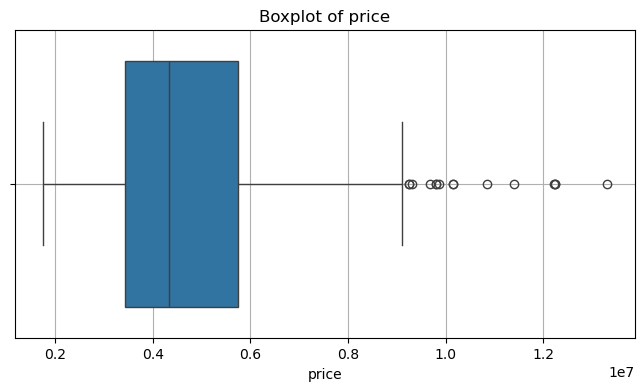

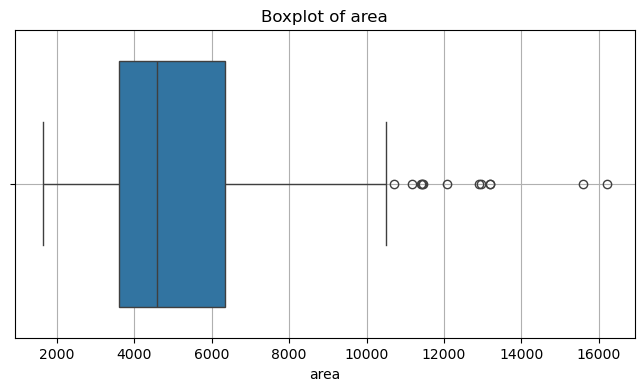

In [14]:
# Boxplots for potential outlier columns
numeric_cols = ['price', 'area']

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.grid(True)
    plt.show()

#### Applying Transformation
Our data reveals outliers. But the outliers are real data.

In this case, they can be:
- Legit high-priced properties,
- Unique combinations (e.g., very large homes),
- Or rare but real scenarios (e.g., mansions in a housing dataset).
  
##### Note: In such cases, removing them would reduce the integrity and usefulness of our model, especially if we want it to predict those kinds of values in the future.

#### Instead, we use these strategies:
1. Log transformation.
2. Robust Models: Tree-based models like Random Forest and XGBoost are less sensitive to outliers.
   
#### Log transformation is the most common and effective tool for this in regression.
##### Why?
- It reduces the scale of extreme values while preserving their relative order.
- This helps linear models (and others) handle skewed data without discarding any points.

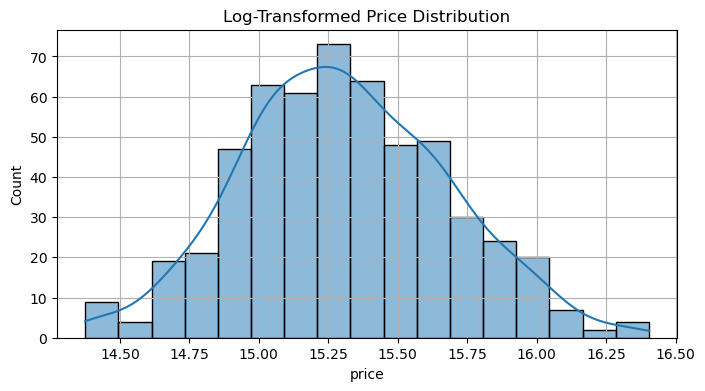

In [15]:
# Apply transformation
df['price'] = np.log1p(df['price'])

plt.figure(figsize=(8, 4))
sns.histplot(df['price'], kde=True)
plt.title('Log-Transformed Price Distribution')
plt.grid(True)
plt.show()

In [16]:
# Convert Categorical Columns to Numerical (One-hot Encode)
df_encoded = pd.get_dummies(df, drop_first = True)

In [17]:
# define X and y
X = df_encoded.drop("price", axis = 1)
y = df_encoded["price"]

In [18]:
# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [19]:
# Train Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
# Make Predictions 
y_pred = model.predict(X_test)

#### Mean Squared Error (MSE)
MSE is the average of the squares of the prediction errors.
##### What It Tells You:
- Measures how far off your predictions are — larger errors hurt more because they’re squared.
- Lower MSE = better model (closer to real values).
- Units: same as your target variable squared.

#### R² Score (Coefficient of Determination)
R² measures how much of the variance in the target variable is explained by your model.
##### What It Tells You:
Ranges from 0 to 1 (can be negative if the model is worse than a horizontal line).

- 1.0 = perfect predictions
- 0.0 = model predicts no better than the mean
- < 0 = model is worse than predicting the mean

#### Root Mean Squared Error (RMSE)
RMSE is the square root of the Mean Squared Error.
##### What It Tells You:
- Represents the average error between predicted and actual values — in the same units as your target variable.
- Easier to interpret than MSE because it’s not squared.
- Like MSE, lower RMSE = better model performance

In [21]:
print("MSE: ", mean_squared_error(y_test, y_pred))
print("R2_Score: ", r2_score(y_test, y_pred))
print("RSME:", np.sqrt(mean_squared_error(y_test, y_pred)))

MSE:  0.06329354097113259
R2_Score:  0.672204741650139
RSME: 0.25158207601324184


#### Importance of Each Feature

In [22]:
# Coefficients for Each Feature
coefficients = pd.Series(model.coef_, index=X.columns)
print("\nFeature Importance:")
print(coefficients.sort_values(ascending = False))

print("Intercept:", model.intercept_)


Feature Importance:
bathrooms                          0.186955
airconditioning_yes                0.157919
hotwaterheating_yes                0.130089
prefarea_yes                       0.125728
mainroad_yes                       0.111925
basement_yes                       0.099003
stories                            0.082593
guestroom_yes                      0.053951
parking                            0.036906
bedrooms                           0.020279
furnishingstatus_semi-furnished    0.001132
area                               0.000048
furnishingstatus_unfurnished      -0.109355
dtype: float64
Intercept: 14.3924845752577


#### Visualizing Performance of the Model

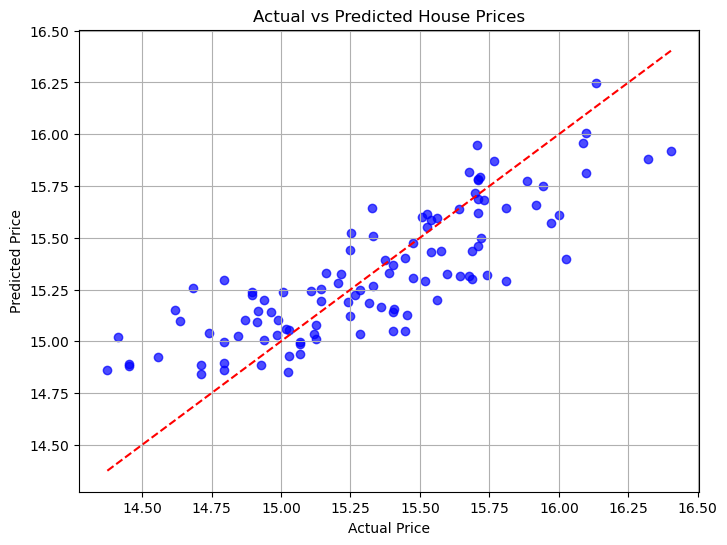

In [23]:
# Plotting Actual vs Predicted House Prices 
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')

# A perfect prediction line (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')

plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted House Prices')
plt.grid(True)
plt.show()